In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Upload the file
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv('car data.csv')
df.head()

Saving car data.csv to car data.csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

# Summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
print("Fuel Types:", df['Fuel_Type'].unique())
print("Transmission Types:", df['Transmission'].unique())
print("Selling Types:", df['Selling_type'].unique())
print("Owner Types:", df['Owner'].unique())

Fuel Types: ['Petrol' 'Diesel' 'CNG']
Transmission Types: ['Manual' 'Automatic']
Selling Types: ['Dealer' 'Individual']
Owner Types: [0 1 3]


In [15]:
# Encode all categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


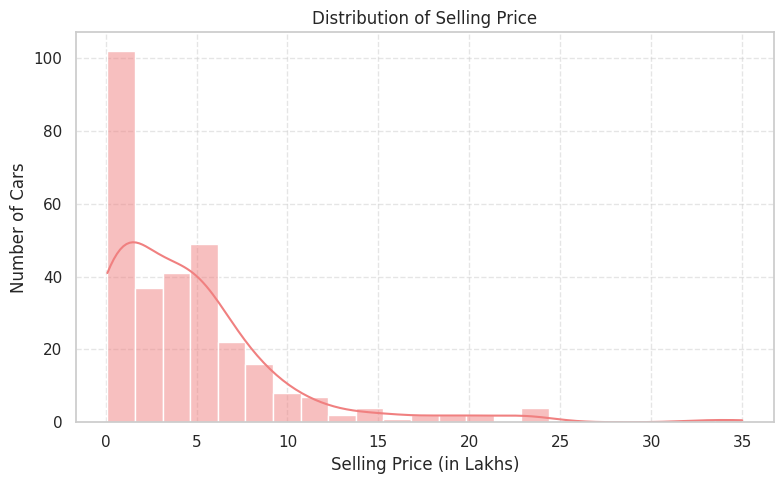

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True, color='lightcoral')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Number of Cars')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

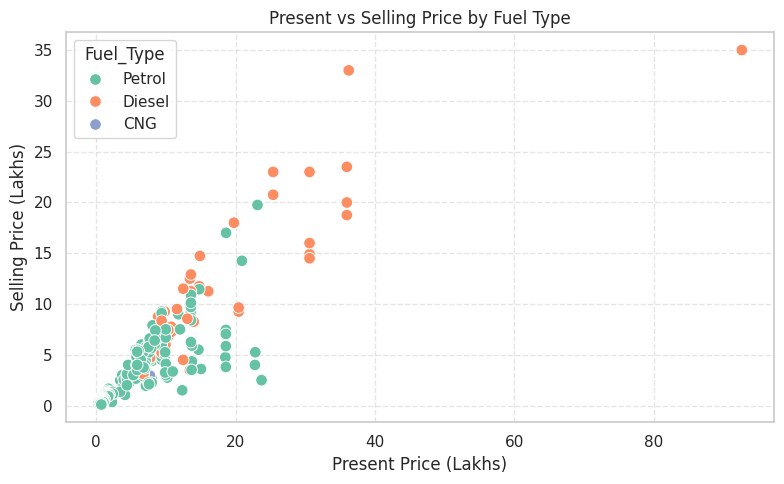

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', palette='Set2', s=70)
plt.title('Present vs Selling Price by Fuel Type')
plt.xlabel('Present Price (Lakhs)')
plt.ylabel('Selling Price (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

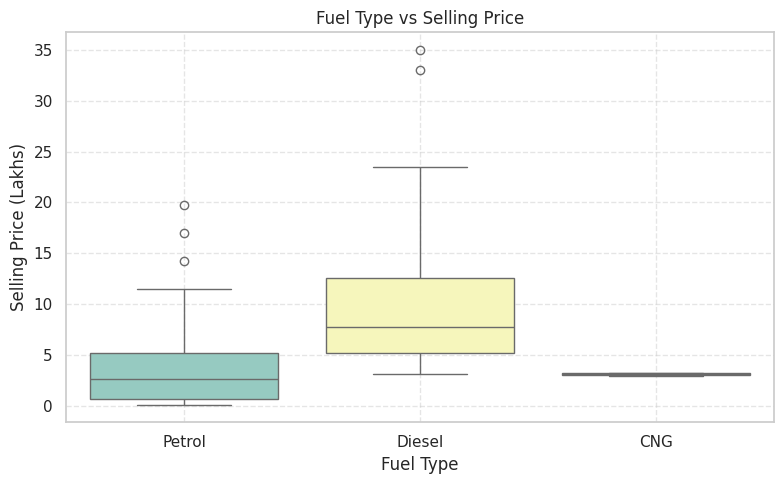

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Fuel_Type',
    y='Selling_Price',
    hue='Fuel_Type',
    palette='Set3',
    dodge=False,
    legend=False  # hide extra legend
)
plt.title('Fuel Type vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
# Drop irrelevant column
df_model = df.drop('Car_Name', axis=1)

# Convert categorical to numeric
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [32]:
X = df_model.drop('Selling_Price', axis=1)
y = df_model['Selling_Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [34]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240, 8)
X_test shape: (61, 8)
y_train shape: (240,)
y_test shape: (61,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy Score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

R2 Score: 0.8488707839191938
Mean Absolute Error: 1.2163740193336217


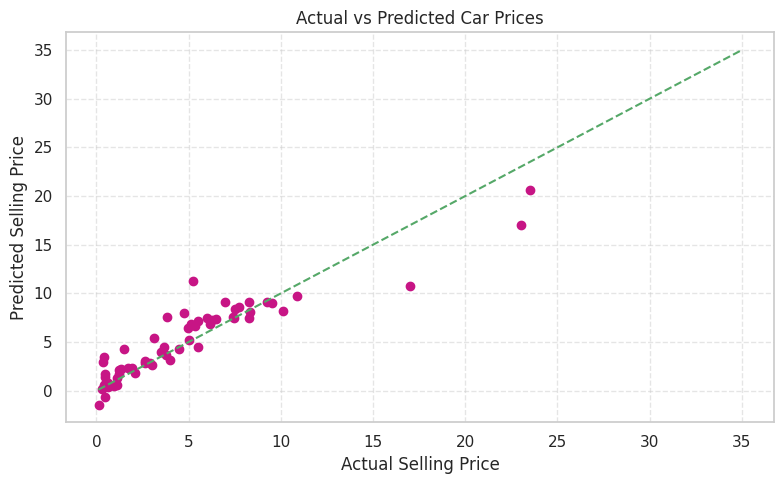

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='mediumvioletred')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'g--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()